In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

## Functions

In [3]:
def listdir(path, ending=None):
    '''Returns dir with full path'''
    if ending == None:
        return sorted([os.path.join(path, f) for f in os.listdir(path)])
    else:
        return sorted([os.path.join(path, f) for f in os.listdir(path)
                       if f.endswith(ending)])

In [4]:
def load_embeddings(ops_list):
    embeddings, text = [], []
    for op in ops_list:
        df = pd.read_pickle(op)
        text.extend(df['Text'].to_list())
        embeddings.append(np.vstack(df['Embeddings'].to_numpy()))
    return np.vstack(embeddings), text

In [5]:
def plot_class_distribution(ops_list_1, ops_list_2, label_1, label_2, title):
    count_1 = np.zeros((len(ops_list_1), 8))
    for i, op in enumerate(ops_list_1):
        array_count = np.zeros(8, dtype=int)
        df = pd.read_pickle(op)
        df['Phase_Label'] = df['Phase_Label'].astype(int)
        phases = df['Phase_Label'].value_counts().drop(8, errors='ignore')
        array_count[phases.index] = phases.values
        count_1[i, :] = array_count
    
    count_2 = np.zeros((len(ops_list_2), 8))
    for i, op in enumerate(ops_list_2):
        array_count = np.zeros(8, dtype=int)
        df = pd.read_pickle(op)
        df['Phase_Label'] = df['Phase_Label'].astype(int)
        phases = df['Phase_Label'].value_counts().drop(8, errors='ignore')
        array_count[phases.index] = phases.values
        count_2[i, :] = array_count
    
    count_1 = np.log10(count_1+0.001)
    count_1[count_1 < 0] = 0
    count_2 = np.log10(count_2+0.001)
    count_2[count_2 < 0] = 0
    
    # Number of phases
    num_phases = 8

    # Create the figure and axes
    plt.figure(figsize=(7, 4), dpi=100) # set dpi=600 for high resolution

    positions_1 = np.arange(1, num_phases + 1) - 0.1
    positions_2 = np.arange(1, num_phases + 1) + 0.1

    # Violin plot for count_train
    parts1 = plt.violinplot(count_1, positions=positions_1, widths=0.35, showmeans=False, showmedians=False)
    for pc in parts1['bodies']:
        pc.set_facecolor('#1d3557')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    
    # Scatter plot for count_train
    for i in range(num_phases):
        plt.scatter(np.full(len(count_1), positions_1[i]), count_1[:, i], 
                    color='#1d3557', s=20, alpha=0.4, label=label_1 if i == 0 else "")

    # Violin plot for count_test
    parts2 = plt.violinplot(count_2, positions=positions_2, widths=0.35, showmeans=False, showmedians=False)
    for pc in parts2['bodies']:
        pc.set_facecolor('#e63946')
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
    # Scatter plot for count_test
    for i in range(num_phases):
        plt.scatter(np.full(len(count_2), positions_2[i]), count_2[:, i], 
                    color='#e63946', s=20, alpha=0.4, label=label_2 if i == 0 else "")

    # Adding labels and limits
    #plt.ylim(0, 200)
    #plt.title(title)
    plt.ylabel('Sentence Count', fontsize=18)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'$10^{{{y}}}$'))
    #plt.xlabel('Phase Index', fontsize=18)

    # Adding legend for scatter points
    leg = plt.legend(ncol=2, fontsize=14, framealpha=1.0, columnspacing=1.0, handletextpad=0.1, markerscale=1.5)
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    # Customizing the x-axis ticks to reflect phase indices
    plt.xticks(np.arange(1, num_phases + 1), [f'Phase {i}' for i in range(num_phases)], fontsize=16, rotation=25)
    plt.yticks(fontsize=16)

    # Show the plot
    plt.savefig('Figure_2.png', bbox_inches='tight')
    plt.show()

## Analysis

Read Data

In [7]:
synops_path = '/DATA/kubi/Dataset/SynPoCaP/'
realops_path = '/DATA/kubi/Dataset/PoCaP/'

synops_list = listdir(synops_path, ending='.pkl')
realops_list = listdir(realops_path, ending='.pkl')

synops_tag = 'SynPoCaP'
realops_tag = 'PoCaP'

Class Distribution

/tmp/ipykernel_3803006/3570134295.py:66: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


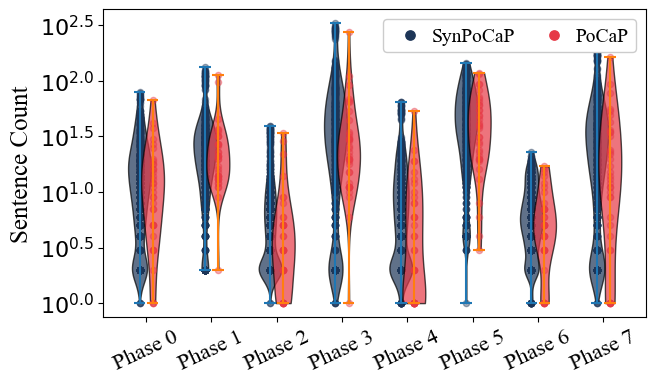

In [8]:
plot_class_distribution(synops_list, 
                        realops_list, 
                        synops_tag, 
                        realops_tag, 
                        'Comparison of Phase Distributions'
)